<a href="https://colab.research.google.com/github/jamescavanagh/unpackAI/blob/main/Tomato_Leaves_health_classifier_w3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*# First Run of Model

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 727kB 8.4MB/s 
     |████████████████████████████████| 204kB 17.9MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 1.2MB 14.6MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
Mounted at /content/gdrive
Mounted at /content/drive


In [ ]:
!ls

In [ ]:
root_dir = "/content/drive/MyDrive/Colab Data"
base_dir = root_dir + '/Tomato_Sample'
tomato_healthy_dir = base_dir + '/Tomato__Healthy/Tomato__Healthy'
tomato_diseased_dir = base_dir + '/Tomato__Diseased/Tomato__Diseased'
list_tomato_healthy = [os.path.join(tomato_healthy_dir, f) for f in os.listdir(tomato_healthy_dir)]
list_tomato_diseased = [os.path.join(tomato_diseased_dir, f) for f in os.listdir(tomato_diseased_dir)]

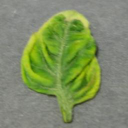

In [ ]:
picked_image = 3
im = Image.open(list_tomato_diseased[picked_image])
im.to_thumb(128,128)

# DataLoader Step

In [ ]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i, self: self[i])


In [ ]:
leaves = DataBlock (
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=99),
    get_y=parent_label,
    item_tfms=Resize(256,256))

In [ ]:
dls = leaves.dataloaders
destination =Path(base_dir)
path = destination
fns = get_image_files(path)
dls = leaves.dataloaders(path)

In [ ]:
#failed = verify_images(fns)
#failed

(#0) []

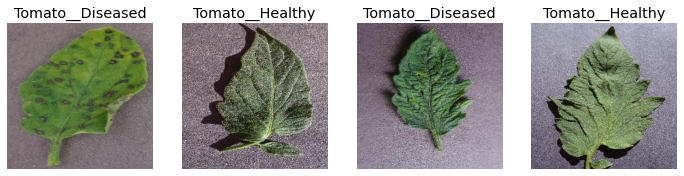

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
leaves = leaves.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = leaves.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(7)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.413657,0.429956,0.093248,09:07


epoch,train_loss,valid_loss,error_rate,time
0,0.113882,0.335438,0.081994,12:08
1,0.061944,0.223763,0.056270,12:04
2,0.048352,0.294136,0.059486,12:01
3,0.033431,0.508116,0.102894,12:01
4,0.026512,0.282798,0.056270,13:02
5,0.023395,0.283425,0.061093,13:15
6,0.015274,0.273747,0.059486,13:01


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


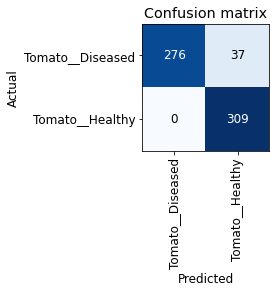

In [ ]:
interp.plot_confusion_matrix()

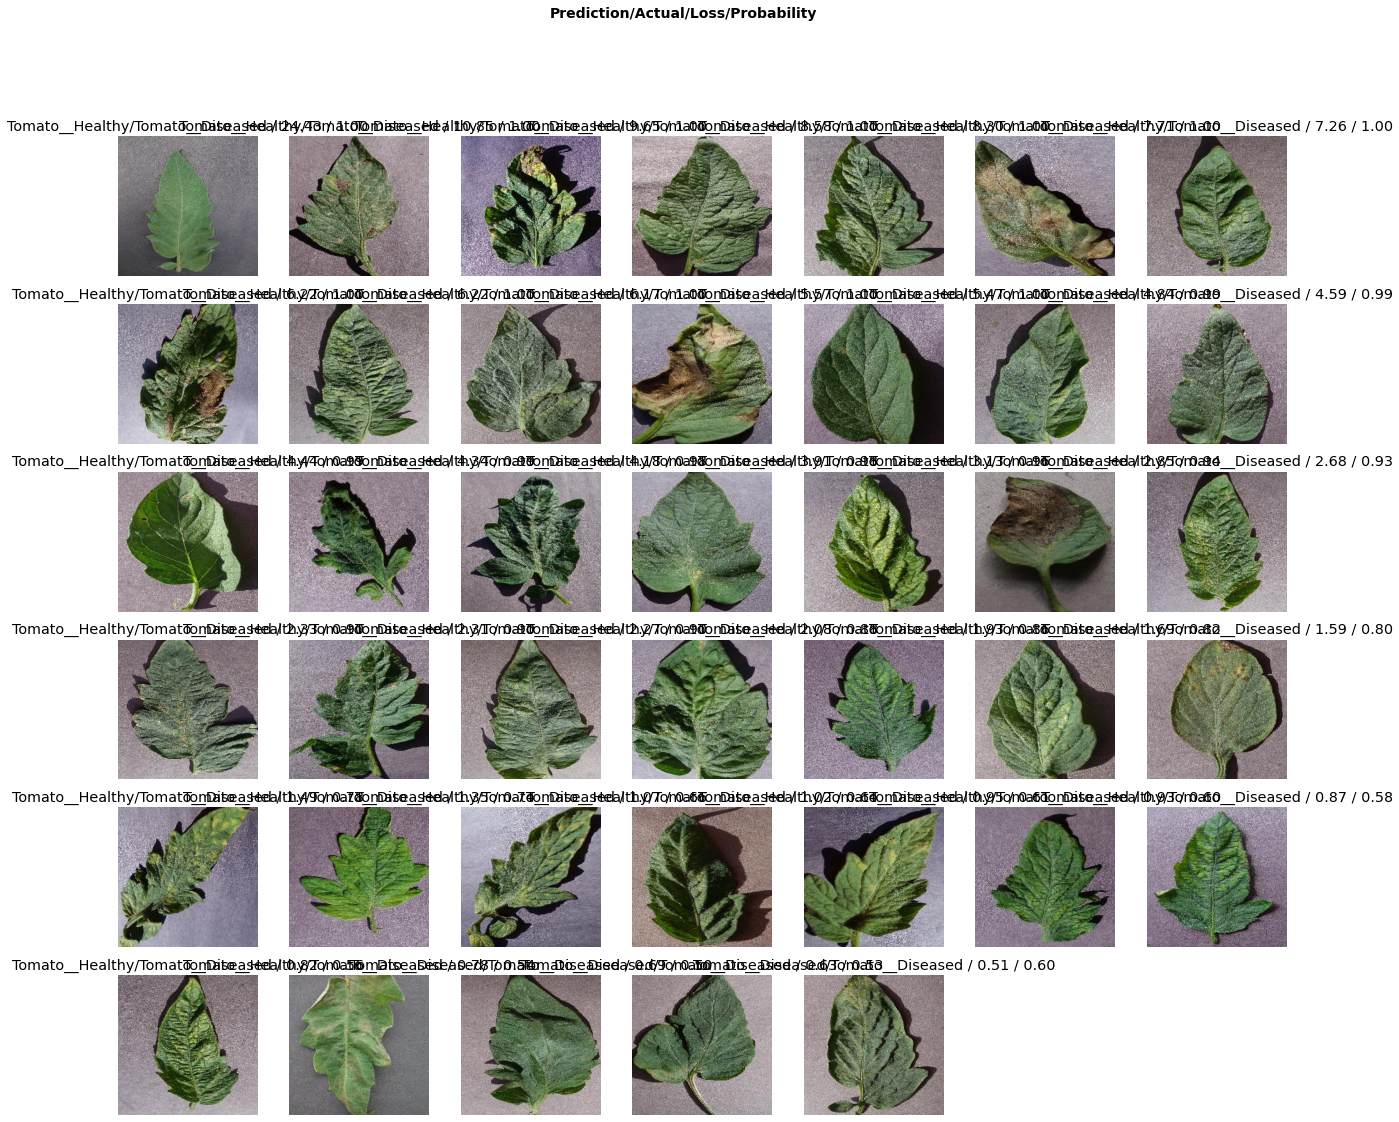

In [ ]:
interp.plot_top_losses(40)

In [ ]:
interp.print_classification_report()

                  precision    recall  f1-score   support

Tomato__Diseased       1.00      0.88      0.94       313
 Tomato__Healthy       0.89      1.00      0.94       309

        accuracy                           0.94       622
       macro avg       0.95      0.94      0.94       622
    weighted avg       0.95      0.94      0.94       622



### Findings from the first iteration of the model

1. 95 percent accuracy

2. 100 percent accuracy for healthy leaves (no false negatives)

3. 88 percent accuracy for unhealthy leaves (unacceptable level of false negatives)

### Examining the false negatives

1. Manual examination shows misdentifcation in three catagories
  
  a. Slightly diseased leaves (early stages)

  b. Grossly deformed leaves

  c. Leaves oriented at 45 degrees. 

It is clear that the model can identify the obviously diseased leaves
but doesn't do well on slightly diseased leaves. Since the model is to 
help humans interviene early to save the plant before disease takes hold.

In this case, it is important that the model gets trained with more
leaves which are slightly diseased. 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os



In [ ]:
root_dir = "/content/drive/MyDrive/Colab Data"
base_dir = root_dir + '/Tomato_Sample'
tomato_sample2 = base_dir + '/'
#list_tomato_healthy = [os.path.join(tomato_healthy_dir, f) for f in os.listdir(tomato_healthy_dir)]
list_tomato_sample2 = [os.path.join(tomato_diseased_dir, f) for f in os.listdir(tomato_diseased_dir)]

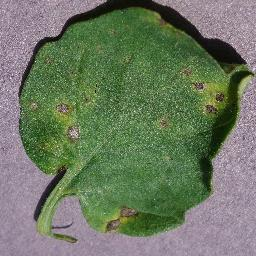

In [ ]:
image = cv2.imread(list_tomato_diseased[375])
cv2_imshow(image)

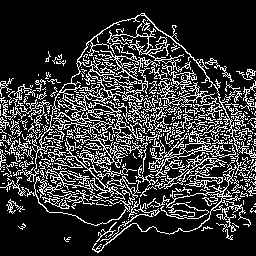

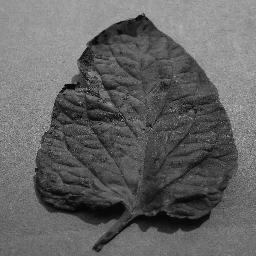

In [ ]:
leaf_file_path = list_tomato_diseased[0]
img = cv2.imread(leaf_file_path)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
canny= cv2.Canny(gray,40,140)
cv2_imshow(canny)
cv2_imshow(gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image=cv2.imread(leaf_file_path)

# make it grayscale
Gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Make it with the help of sobel
# make the sobel_horizontal
# For horizontal x axis=1 and yaxis=0
# for vertical x axis=0 and y axis=1
Horizontal=cv2.Sobel(Gray,0,1,0,cv2.CV_64F)

# the thresholds are like 
# (variable,0,<x axis>,<y axis>,cv2.CV_64F)
Vertical=cv2.Sobel(Gray,0,0,1,cv2.CV_64F)

# DO the Bitwise operation
Bitwise_Or=cv2.bitwise_or(Horizontal,Vertical)

# Show the Edged Image
cv2_imshow(Bitwise_Or)
cv2_imshow(Gray)
cv2.waitKey(0)
cv2.destroyAllWindows()




NameError: ignored

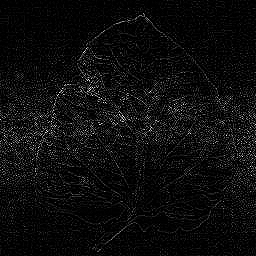

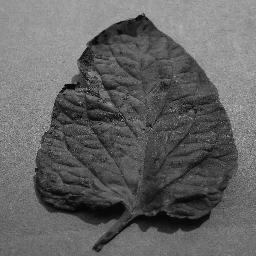

In [ ]:
# read the image and store the data in a variable
image=cv2.imread(leaf_file_path)

# make it grayscale
Gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Make Laplacian Function
Lappy=cv2.Laplacian(Gray,cv2.CV_64F)

cv2_imshow(Lappy)
cv2_imshow(Gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

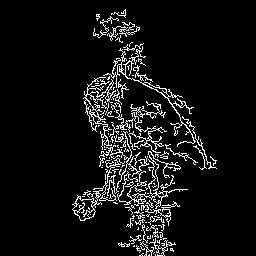

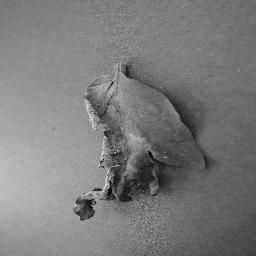

In [ ]:
leaf_file_path = list_tomato_diseased[4]
img = cv2.imread(leaf_file_path)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
canny= cv2.Canny(gray,40,140)
cv2_imshow(canny)
cv2_imshow(gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# New Strategy is to write a filter that deals with the background before going through
# to do edge detection

def edge_removal(leaf_file_path):
  edgeDetectModel = '/content/drive/MyDrive/Colab Data/model.yml'
  src = cv2.imread(leaf_file_path)
  #cv2_imshow(src)
  blurred = cv2.GaussianBlur(src, (5, 5), 0)

  blurred_float = blurred.astype(np.float32) / 255.0
  edgeDetector = cv2.ximgproc.createStructuredEdgeDetection(edgeDetectModel)
  edges = edgeDetector.detectEdges(blurred_float) * 255.0
  #v2.imwrite('edge-raw.jpg', edges)

  def filterOutSaltPepperNoise(edgeImg):
      # Get rid of salt & pepper noise.
      count = 0
      lastMedian = edgeImg
      median = cv2.medianBlur(edgeImg, 3)
      while not np.array_equal(lastMedian, median):
          # get those pixels that gets zeroed out
          zeroed = np.invert(np.logical_and(median, edgeImg))
          edgeImg[zeroed] = 0

          count = count + 1
          if count > 50:
              break
          lastMedian = median
          median = cv2.medianBlur(edgeImg, 3)


  edges_8u = np.asarray(edges, np.uint8)
  filterOutSaltPepperNoise(edges_8u)
  #cv2_imshow(edges_8u)

  def findLargestContour(edgeImg):
      contours, hierarchy = cv2.findContours(
          edgeImg,
          cv2.RETR_EXTERNAL,
          cv2.CHAIN_APPROX_SIMPLE
      )


      # From among them, find the contours with large surface area.
      contoursWithArea = []
      for contour in contours:
          area = cv2.contourArea(contour)
          contoursWithArea.append([contour, area])
      
      contoursWithArea.sort(key=lambda tupl: tupl[1], reverse=True)
      largestContour = contoursWithArea[0][0]
      return largestContour

  contour = findLargestContour(edges_8u)
  # Draw the contour on the original image
  contourImg = np.copy(src)
  cv2.drawContours(contourImg, [contour], 0, (0, 255, 0), 2, cv2.LINE_AA, maxLevel=1)
  #cv2_imshow(contourImg)

  mask = np.zeros_like(edges_8u)
  cv2.fillPoly(mask, [contour], 255)

  # calculate sure foreground area by dilating the mask
  mapFg = cv2.erode(mask, np.ones((5, 5), np.uint8), iterations=10)

  # mark inital mask as "probably background"
  # and mapFg as sure foreground
  trimap = np.copy(mask)
  trimap[mask == 0] = cv2.GC_BGD
  trimap[mask == 255] = cv2.GC_PR_BGD
  trimap[mapFg == 255] = cv2.GC_FGD

  # visualize trimap
  trimap_print = np.copy(trimap)
  trimap_print[trimap_print == cv2.GC_PR_BGD] = 128
  trimap_print[trimap_print == cv2.GC_FGD] = 255
  #cv2_imshow(trimap_print)

  # run grabcut
  bgdModel = np.zeros((1, 65), np.float64)
  fgdModel = np.zeros((1, 65), np.float64)
  rect = (0, 0, mask.shape[0] - 1, mask.shape[1] - 1)
  cv2.grabCut(src, trimap, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

  # create mask again
  mask2 = np.where(
      (trimap == cv2.GC_FGD) | (trimap == cv2.GC_PR_FGD),
      255,
      0
  ).astype('uint8')
  #cv2_imshow(mask2)

  contour2 = findLargestContour(mask2)
  mask3 = np.zeros_like(mask2)
  cv2.fillPoly(mask3, [contour2], 255)

  # blended alpha cut-out
  mask3 = np.repeat(mask3[:, :, np.newaxis], 3, axis=2)
  mask4 = cv2.GaussianBlur(mask3, (3, 3), 0)
  alpha = mask4.astype(float) * 1.1  # making blend stronger
  alpha[mask3 > 0] = 255.0
  alpha[alpha > 255] = 255.0

  foreground = np.copy(src).astype(float)
  foreground[mask4 == 0] = 0
  background = np.ones_like(foreground, dtype=float) * 255.0

  #cv2.imwrite('foreground.png', foreground)
  #cv2.imwrite('background.png', background)
  #cv2.imwrite('alpha.png', alpha)

  # Normalize the alpha mask to keep intensity between 0 and 1
  alpha = alpha / 255.0
  # Multiply the foreground with the alpha matte
  foreground = cv2.multiply(alpha, foreground)
  # Multiply the background with ( 1 - alpha )
  background = cv2.multiply(1.0 - alpha, background)
  # Add the masked foreground and background.
  cutout = cv2.add(foreground, background)

  return cutout


edgeDetectModel = '/content/drive/MyDrive/Colab Data/model.yml'

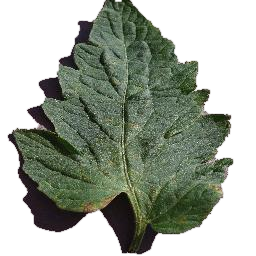

In [ ]:
leaf_file_path = list_tomato_diseased[200]
img = edge_removal(leaf_file_path)
#old_img = cv2.imread(leaf_file_path)
cv2_imshow(img)



In [ ]:
from matplotlib import pyplot



In [ ]:
remove_shadow = cv2.threshold(img[:,:,1],15,255,cv2.THRESH_BINARY_INV)
remove_shadow.astype(np)

In [2]:
lower_shadow = np.array(0,0,0)
upper_shadow = np.array(40,40,40)
img = new_img.astype(np.float32)

Gray = cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
ret, shadowPortion = cv2.threshold(Gray,20,255,cv2.THRESH_BINARY_INV)

# Convert to HSV colorspace
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

# Define color range for masking
lower = n.array([0,100,100])
upper = n.array([20,255,255])

# Apply the mask
mask = cv2.inRange(hsv, lower, upper)

    #(source, destination, mask to apply)
result = cv2.bitwise_and(im,im, mask=mask)

# Image similarity, mean function to monitor for changes 
# in the image



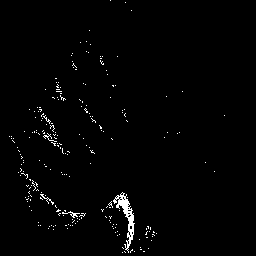

In [ ]:
cv2_imshow(shadowPortion)


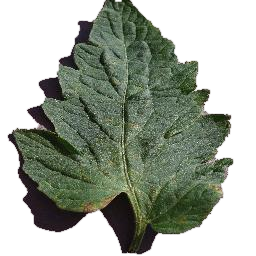

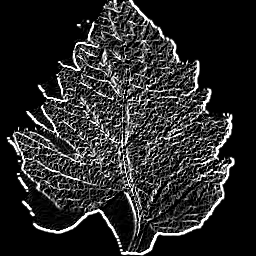

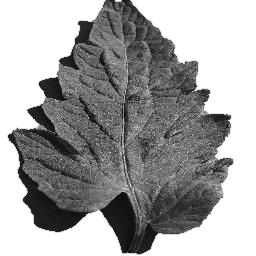

In [ ]:
#leaf_file_path = list_tomato_diseased[0]
#img = cv2.imread(leaf_file_path)


Gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
#grayLevel = Gray[2]
#grayLevel = np.where(grayLevel > 0.8,255,grayLevel)
#Gray[2] = grayLevel
Horizontal=cv2.Sobel(Gray,0,1,0,cv2.CV_64F)

# the thresholds are like 
# (variable,0,<x axis>,<y axis>,cv2.CV_64F)
Vertical=cv2.Sobel(Gray,0,0,1,cv2.CV_64F)

# DO the Bitwise operation
Bitwise_Or=cv2.bitwise_or(Horizontal,Vertical)

# Show the Edged Image
cv2_imshow(Bitwise_Or)
cv2_imshow(Gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: ignored

In [ ]:
img_thres = Gray
img_thres[2][ img_thres[2] < 40 ] = 255

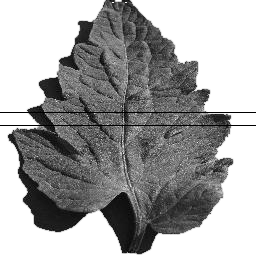

In [ ]:
mask = np.zeros()

In [ ]:
bw = cv.cvtColor(img,cv.COLOR_BGR2GRAY)  # Converting the Orginal image to Gray
bw_bgr = cv.cvtColor(bw,cv.COLOR_GRAY2BGR) # Converting the Gray image to BGR format
result2 = cv.bitwise_or(bw_bgr,result) # Performing Bitwise OR operation with gray bgr image and previous result image
cv.imshow('Image2',result2)  # Showing The Final Result Image
cv.waitKey(0)
cv.destroyWindow('Image2')


NameError: ignored